In [1]:
#load the data
import pandas as pd
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Decision Trees\\Company_Data.csv")

In [2]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape #(400, 11)

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Convert 'Sales' into a categorical variable (e.g., High Sales and Low Sales)
threshold = df['Sales'].quantile(0.75)  # You can adjust the threshold as needed

In [6]:
df['Sales'] = df['Sales'].apply(lambda x: 'High Sales' if x >= threshold else 'Low Sales')

In [7]:
#EDA----->EXPLORATORY DATA ANALYSIS
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
data = df[df.columns[[1,2,3,4,5,7,8]]]

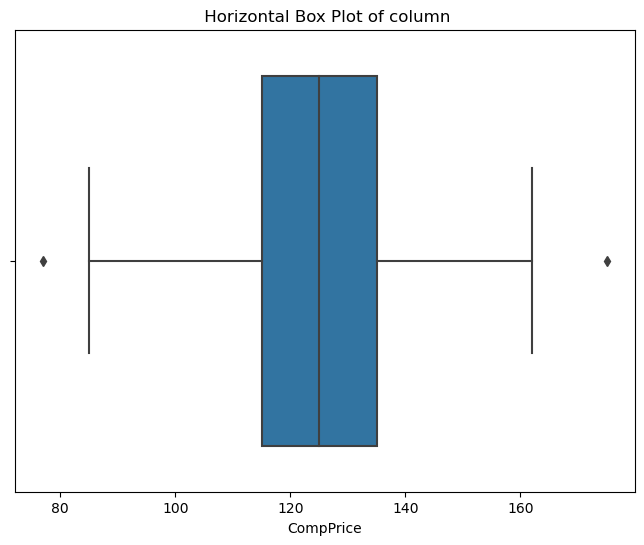

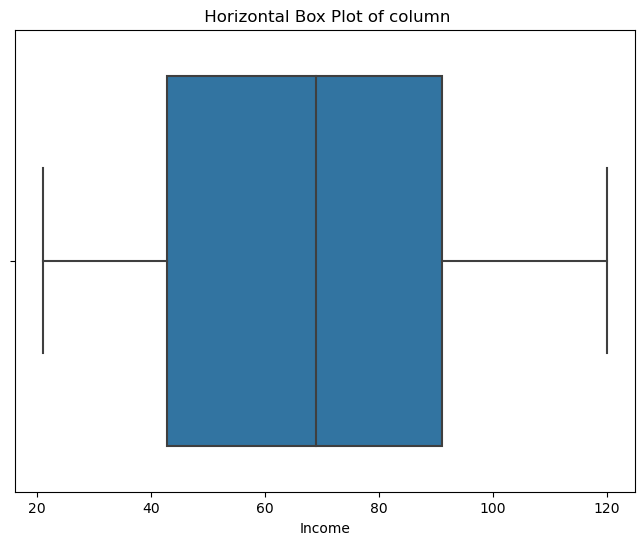

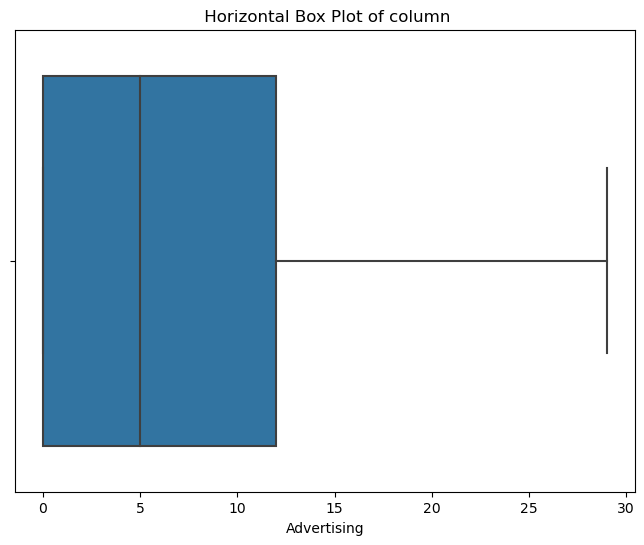

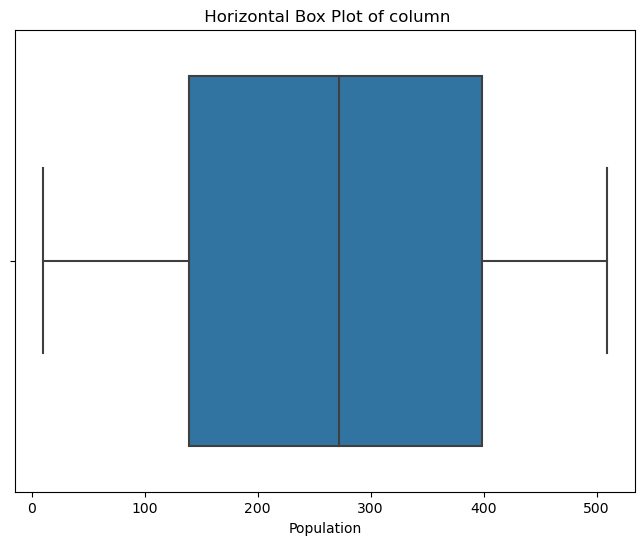

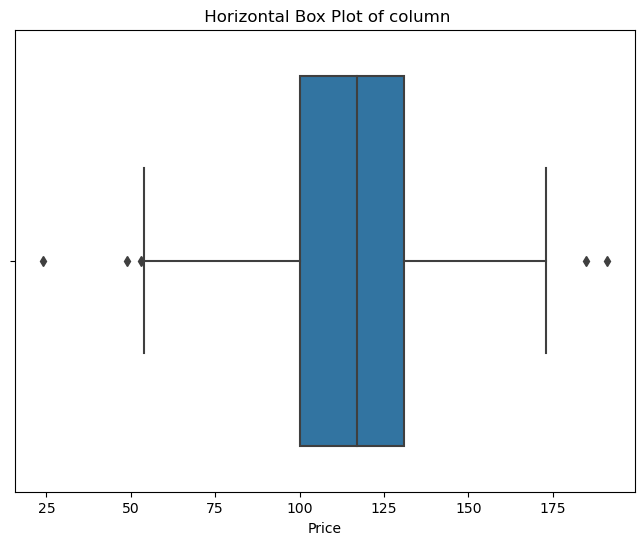

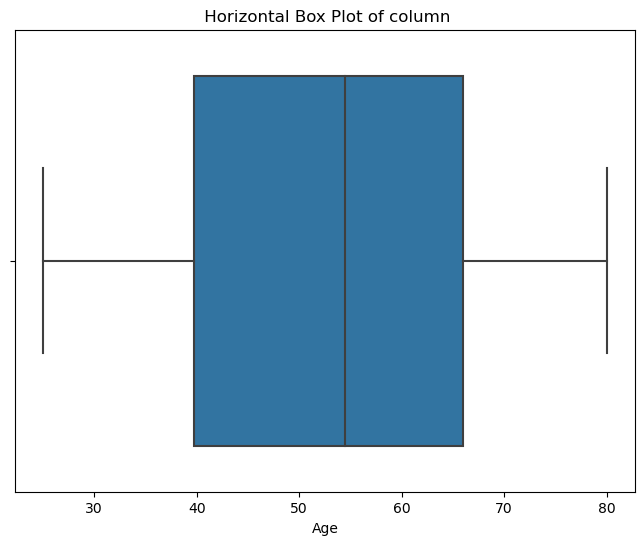

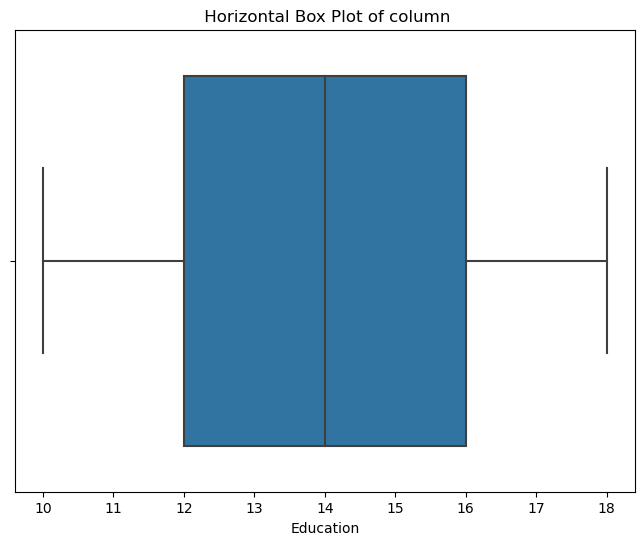

In [9]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

In [10]:
#We can see there are some outliers present 

#Removing the outliers
df1 = df[df.columns[[1,2,3,4,5,7,8]]]
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [11]:
from scipy import stats
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [12]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1))

In [13]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [14]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]

In [15]:
df.shape  #(397, 11)

(397, 11)

array([[<AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Advertising'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

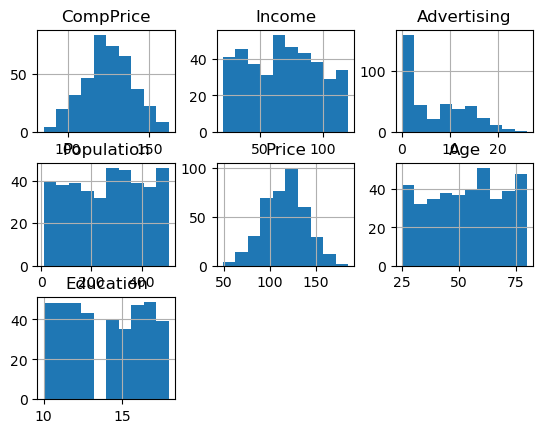

In [16]:
# Now, df contains the data with outliers removed

#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [17]:
df.skew()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_11816\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CompPrice     -0.053566
Income         0.045656
Advertising    0.589072
Population    -0.053280
Price         -0.081927
Age           -0.080826
Education      0.044988
dtype: float64

In [18]:
df.kurt()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_11816\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


CompPrice     -0.212801
Income        -1.098533
Advertising   -0.736543
Population    -1.194321
Price         -0.025287
Age           -1.139465
Education     -1.299541
dtype: float64

In [19]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,124.914358,68.692695,6.594458,265.471033,115.710327,53.397985,13.891688
std,14.952204,28.086110,6.571616,147.003633,22.866967,16.206614,2.620019
min,85.000000,21.000000,0.000000,10.000000,49.000000,25.000000,10.000000
25%,115.000000,42.000000,0.000000,140.000000,100.000000,40.000000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,55.000000,14.000000
75%,135.000000,91.000000,12.000000,398.000000,131.000000,66.000000,16.000000
max,162.000000,120.000000,26.000000,509.000000,185.000000,80.000000,18.000000


In [20]:
#LabelEncoding for categorical Variables
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])

In [22]:
df["Urban"] = LE.fit_transform(df["Urban"])

In [23]:
df["US"] = LE.fit_transform(df["US"])

In [24]:
# Split the data into features (X) and the target variable (y)
X = df.drop("Sales", axis=1)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [25]:
Y = df["Sales"]
Y

0      High Sales
1      High Sales
2      High Sales
3       Low Sales
4       Low Sales
          ...    
395    High Sales
396     Low Sales
397     Low Sales
398     Low Sales
399    High Sales
Name: Sales, Length: 397, dtype: object

In [26]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=123)

In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
Y_pred_train = DT.predict(X_train)
Y_pred_train

array(['Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'High Sales', 'High Sales', 'Low Sales',
       'High Sales', 'Low Sales', 'High Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'High Sales', 'High Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'High Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'High Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'High Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'High Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'High Sales', 'Low

In [30]:
Y_pred_test = DT.predict(X_test)
Y_pred_test

array(['Low Sales', 'Low Sales', 'High Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'High Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'High Sales', 'High Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'High Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'High Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'High Sales', 'Low Sales', 'High Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'High Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'High Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'High Sales', 'High Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'Low Sales', 'High Sales', 'Low Sales', 'Lo

In [32]:
#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  #ac1 = 1.0
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing Accuracy Score:",ac2.round(3))  #ac2 = 0.78

Training Accuracy Score: 1.0
Testing Accuracy Score: 0.78


In [33]:
#Only runs in Google Colab
from sklearn import tree
import graphviz

In [34]:
dot_data = tree.export_graphviz(DT,filled= True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 

In [35]:
print("Number of nodes",DT.tree_.node_count)    #Number of nodes 65
print("Level of depth",DT.tree_.max_depth)      #Level of depth 9

Number of nodes 65
Level of depth 9


In [36]:
#Validation Set Approach
training_accuracy = []
test_accuracy = []

In [37]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=i)
    DT = DecisionTreeClassifier(criterion='gini',max_depth=9)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

In [38]:
import numpy as np
print("Average Training Accuracy:",np.mean(training_accuracy).round(3)) #Average Training Accuracy: 0.994
print("Average Test Accuracy:",np.mean(test_accuracy).round(3))         #Average Test Accuracy: 0.779


Average Training Accuracy: 0.994
Average Test Accuracy: 0.779


In [39]:
#Grid Search CV
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

In [40]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [41]:
# Create a Decision Tree classifier
DT = DecisionTreeClassifier(random_state=123)

In [42]:
# Create GridSearchCV object
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

In [43]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)   #Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [45]:
# Print the best accuracy score found by GridSearchCV
print("Best Accuracy Score:", grid_search.best_score_)  #Best Accuracy Score: 0.8080790960451978

Best Accuracy Score: 0.8080790960451978


In [46]:
# Get the best model from the GridSearchCV
best_DT = grid_search.best_estimator_

In [47]:
# Predict using the best model
Y_pred_train = best_DT.predict(X_train)
Y_pred_test = best_DT.predict(X_test)

In [48]:
# Metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy Score:", ac1.round(3))   #Training Accuracy Score: 0.926
ac2 = accuracy_score(Y_test, Y_pred_test)
print("Test Accuracy Score:", ac2.round(3))       #Test Accuracy Score: 0.83

Training Accuracy Score: 0.926
Test Accuracy Score: 0.83


In [49]:
#Parallel Ensemble Methods
#Bagging
from sklearn.ensemble import BaggingClassifier

In [50]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=123) 

In [51]:
Bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  max_features=0.7, max_samples=0.6, n_estimators=100,
                  random_state=123)

In [52]:
Y_pred_train = Bag.predict(X_train)
Y_pred_test = Bag.predict(X_test)

In [53]:
#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))   #Training Accuracy Score:0.993
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))   #Test Accuracy Score: 0.83

Training Accuracy Score: 0.993
Test Accuracy Score: 0.83


In [54]:
#Ada Boost (Adaptive Boosting Techniques)
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100,
                         learning_rate=0.1)

In [55]:
ABC.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [56]:
Y_pred_train = ABC.predict(X_train)
Y_pred_test = ABC.predict(X_test)

In [57]:
#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))   #Training Accuracy Score:1.0 
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))   #Test Accuracy Score: 0.76

Training Accuracy Score: 1.0
Test Accuracy Score: 0.76


In [58]:
#Visualisation
# Selecting a subset of features for pairplot
selected_features = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']

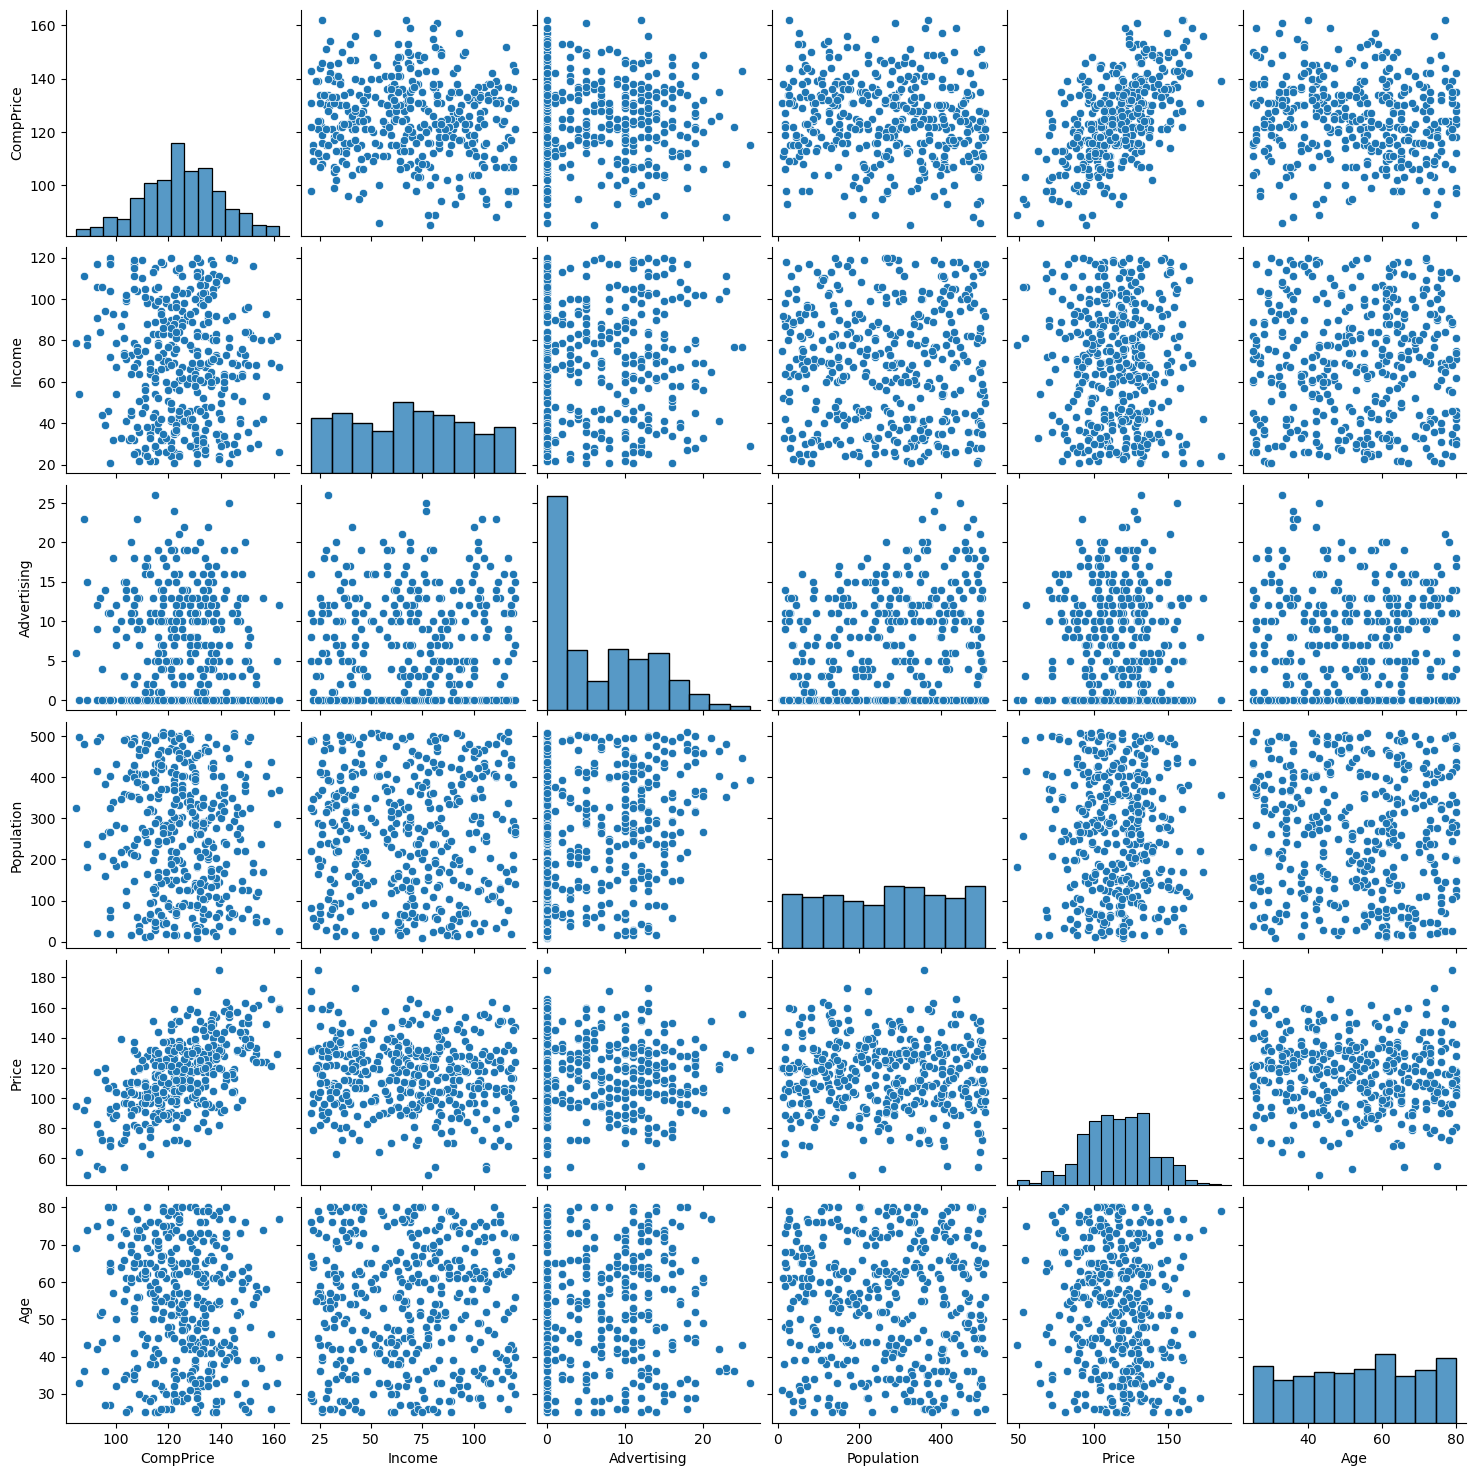

In [59]:
# Pairplot for Selected Features:
sns.pairplot(df[selected_features])
plt.show()

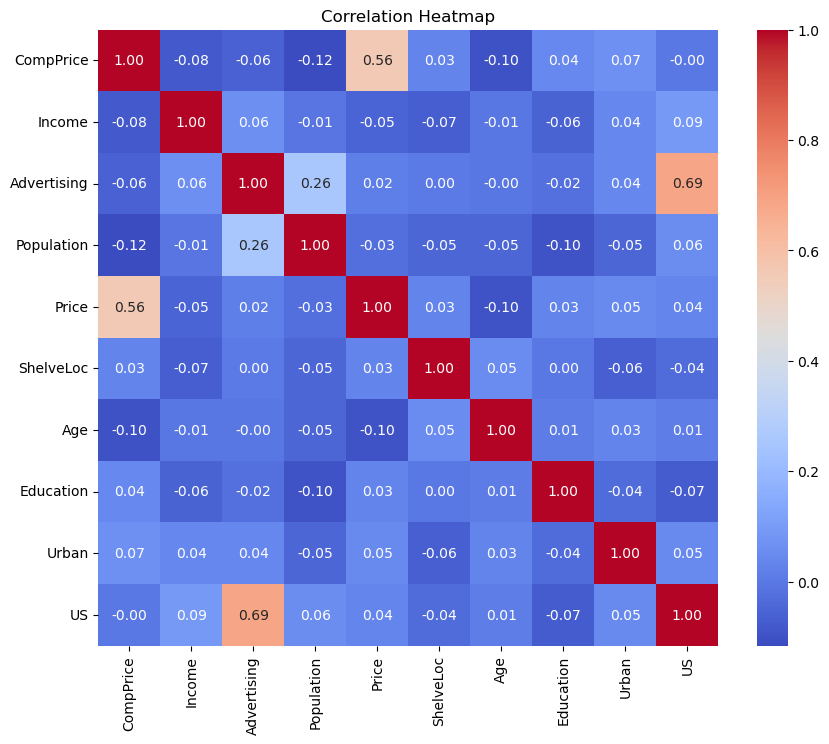

In [60]:
## Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# The Decision Tree model achieved perfect accuracy (1.0) on the training set, indicating it perfectly fit the training data.
# there is a drop in accuracy on the test set (0.8), suggesting potential overfitting
'''The Bagging classifier, using Decision Trees with a maximum depth of 7, achieved high training accuracy (0.993) and slightly improved test accuracy (0.83).
Bagging helps reduce overfitting, as evidenced by the improved test accuracy compared to the standalone Decision Tree.'''

'''The AdaBoost classifier, using Decision Trees as base estimators, achieved perfect training accuracy (1.0) but lower test accuracy (0.77).
AdaBoost tends to be sensitive to noisy data, and the drop in test accuracy might indicate some overfitting or sensitivity to outliers.'''